## Practical 09 - Train a 3 layer neural network with IRIS Dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df=pd.read_csv('dataset/iris.csv')
df.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = df.iloc[:, :-1]  # All columns except the last one (label)
y = df.iloc[:, -1]   # Only the last column (label)

In [4]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [6]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(10, activation='relu'),        # First hidden layer with 10 neurons
    layers.Dense(10, activation='relu'),        # Second hidden layer with 10 neurons
    layers.Dense(y_encoded.shape[1], activation='softmax')  # Output layer with softmax activation
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 2.2361 - accuracy: 0.2812 - val_loss: 1.5238 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.9924 - accuracy: 0.2812 - val_loss: 1.4291 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.7946 - accuracy: 0.2708 - val_loss: 1.3901 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 1.6559 - accuracy: 0.2500 - val_loss: 1.4000 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 1.5610 - accuracy: 0.1250 - val_loss: 1.4395 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 1.5224 - accuracy: 0.1667 - val_loss: 1.4911 - val_accuracy: 0.2917
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 1.4837 - accuracy: 0.2396 - val_loss: 1.5246 - val_accuracy: 0.2917
Epoch 8/100
3/3

In [8]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Step 9: Evaluate the Model
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

1/1 [==============================] - 0s 97ms/step
Accuracy of Neural Network: 93.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Accuracy of Neural Network: 93.33%


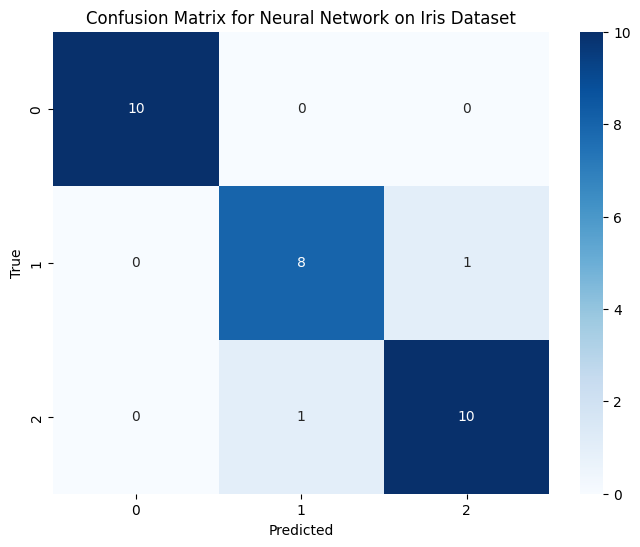

In [9]:
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network on Iris Dataset')
plt.show()